In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [49]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
test=pd.read_csv('test1.csv')

train=pd.read_csv('train.csv')


In [34]:
train.drop('Id', axis=1, inplace=True)


In [35]:
train.info()
#Here we can see that there is no null values and we can see the data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [36]:
train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [37]:
#Drop duplicate Fron train dataset.
train.drop_duplicates(inplace=True)

In [ ]:
train["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [ ]:
train["clarity"].value_counts()


SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [ ]:

train["cut"].value_counts()



Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

## **visualization**

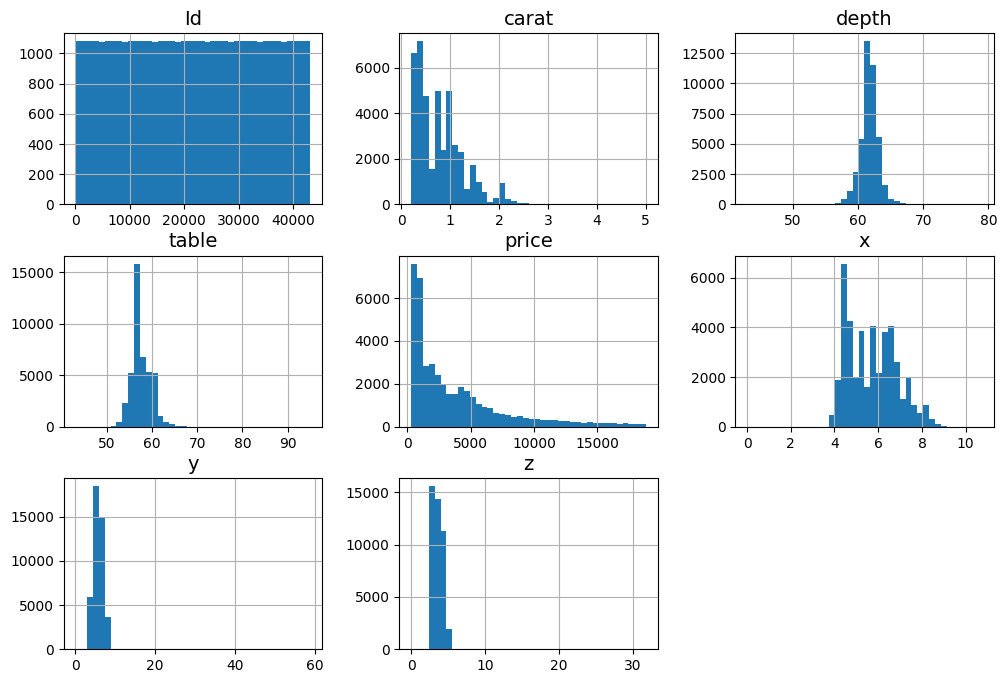

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train.hist(bins=40, figsize=(12, 8))
plt.show()

In [ ]:
train.corr()['price'].sort_values(ascending = False)
 
#as we can see there is a high relation with price

<ipython-input-47-7fa7f7e896f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['price'].sort_values(ascending = False)


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [ ]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


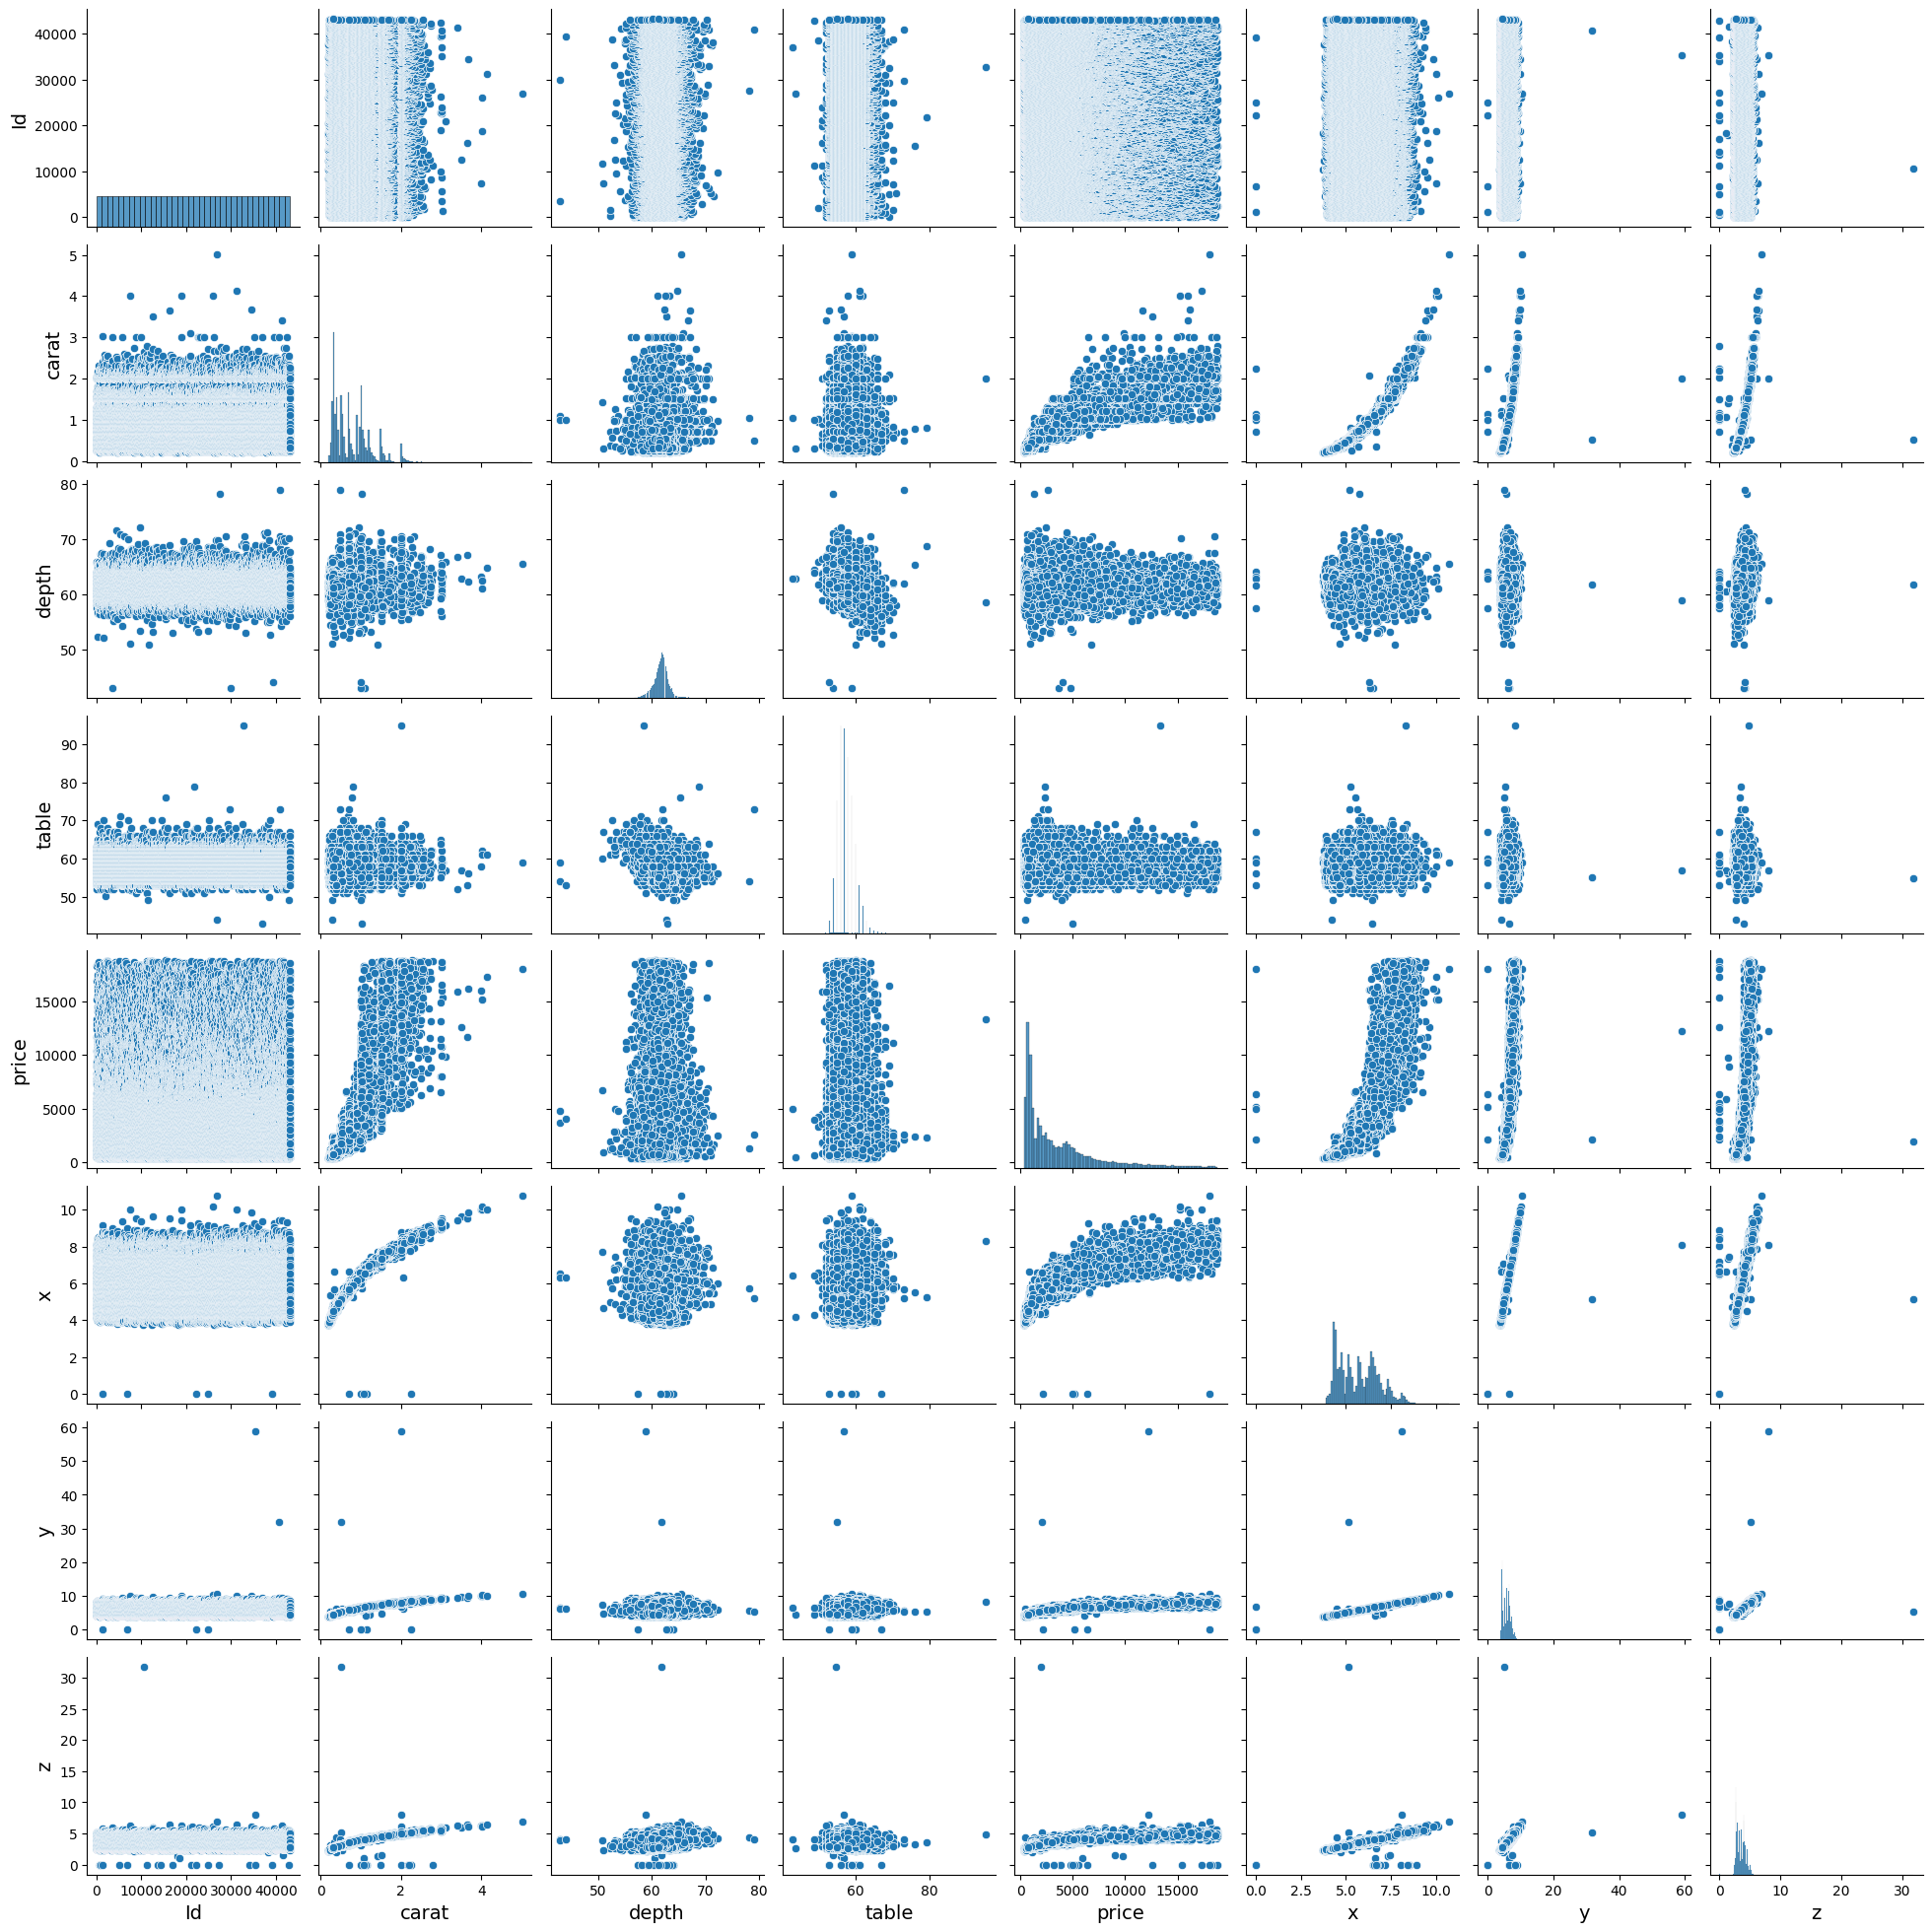

In [ ]:
sns.pairplot(train)

<Axes: xlabel='carat', ylabel='price'>

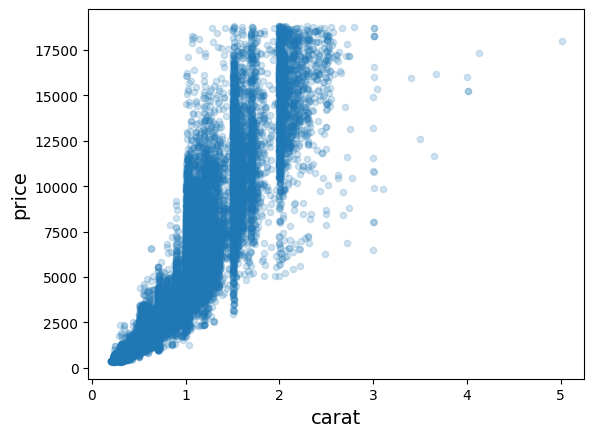

In [ ]:
train.plot.scatter(x="carat",y="price",alpha=0.2)

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

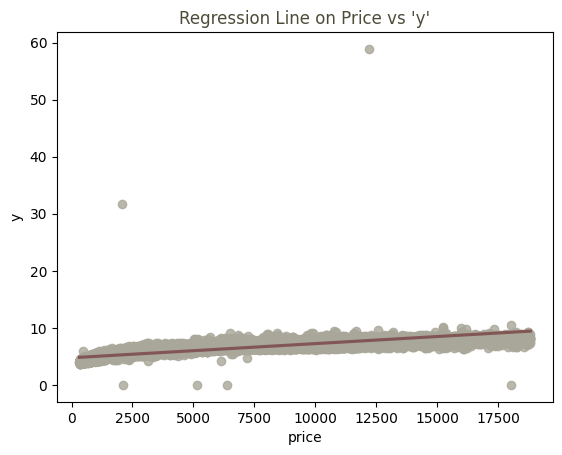

In [6]:
ax = sns.regplot(x="price", y="y", data=train, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

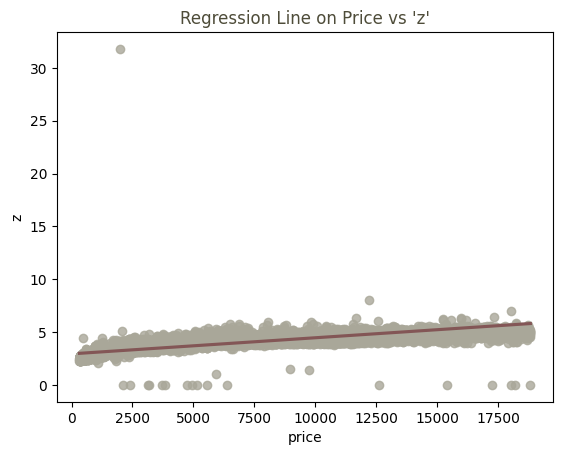

In [7]:
ax= sns.regplot(x="price", y="z", data=train, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

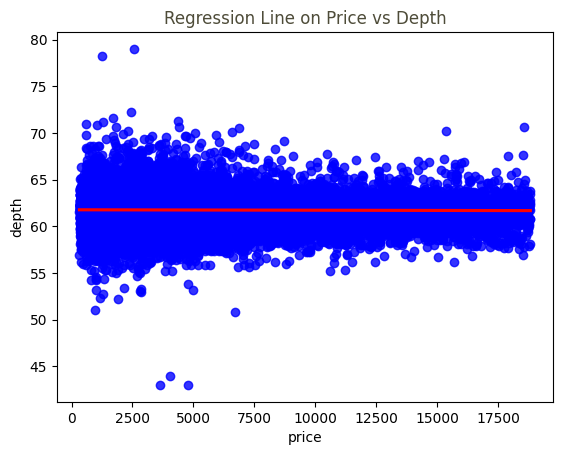

In [11]:
ax= sns.regplot(x="price", y="depth", data=train, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

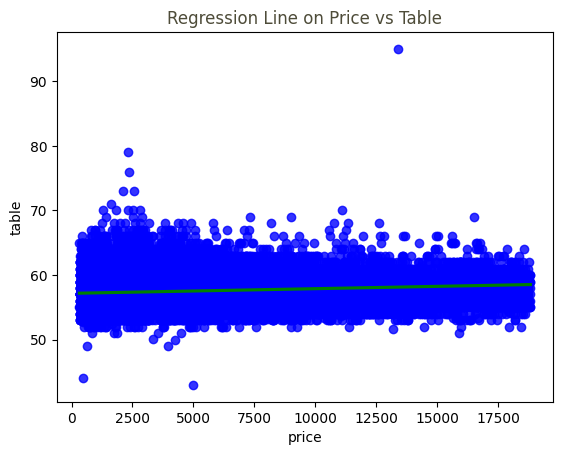

In [12]:
ax=sns.regplot(x="price", y="table", data=train, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "green"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

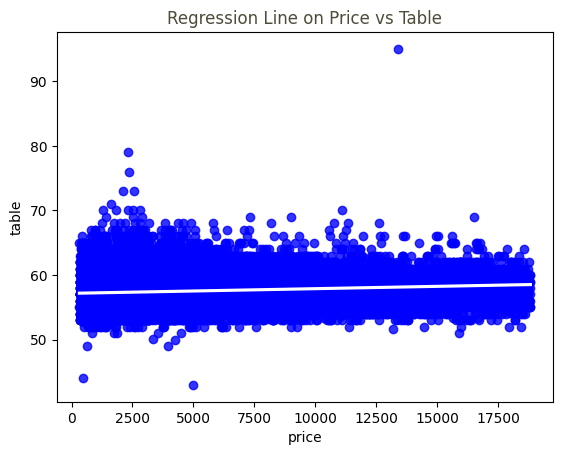

In [14]:
ax=sns.regplot(x="price", y="table", data=train, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "white"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

<Axes: xlabel='price', ylabel='color'>

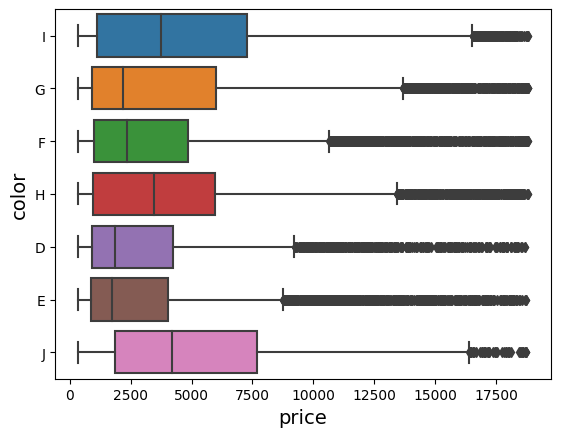

In [ ]:
sns.boxplot(x='price',y='color',data=train)

<Axes: xlabel='price', ylabel='cut'>

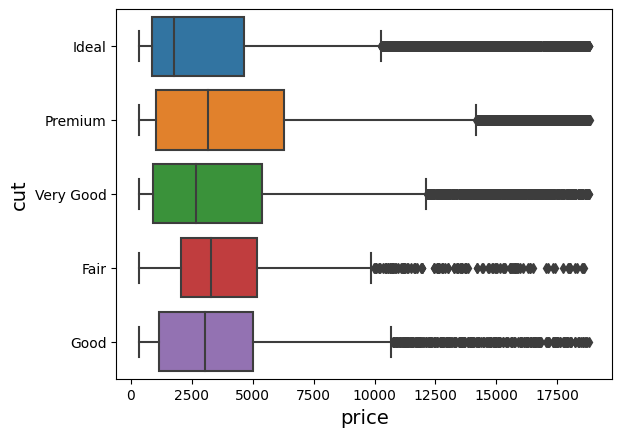

In [ ]:
sns.boxplot(x='price',y='cut',data=train)

<Axes: xlabel='price', ylabel='clarity'>

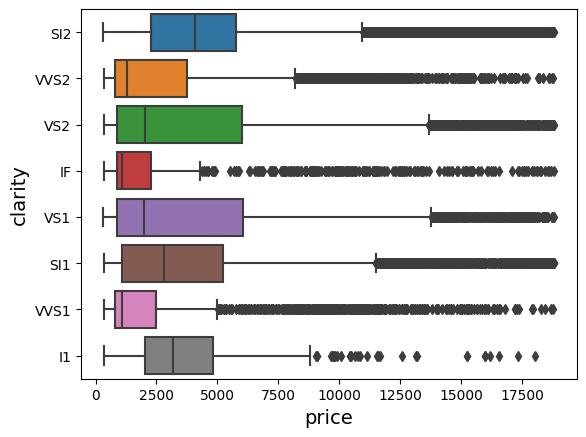

In [ ]:
sns.boxplot(x='price',y='clarity',data=train)

## remove outlier

In [41]:
train_set = train[(train["depth"] < 75) & (train["depth"] > 45)]
train_set = train_set[(train["table"] < 80) & (train["table"] > 40)]
train_set = train_set[(train["x"]<15)]
train_set = train_set[(train["y"]<15)]
train_set = train_set[(train["z"]<15)&(train["z"]>2)]

<ipython-input-41-e6f32f0a3350>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["table"] < 80) & (train["table"] > 40)]
<ipython-input-41-e6f32f0a3350>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["x"]<15)]
<ipython-input-41-e6f32f0a3350>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["y"]<15)]
<ipython-input-41-e6f32f0a3350>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["z"]<15)&(train["z"]>2)]





## **feature selection**

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import math



In [43]:
categorical_col = train[['clarity', 'color', 'cut']]
numerical_col = train[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

In [44]:
train['x']=train['x'].replace(0, train['x'].median())
train['y']=train['y'].replace(0, train['y'].median())
train['z']=train['z'].replace(0, train['z'].median())

In [46]:
categorical_col = train_set[['clarity', 'color', 'cut']]
numerical_col = train_set[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

In [45]:
# tegorical variables into numerical representations, allowing machine learning algorithms to process them. Each unique category is assigned a unique integer value. 
le = LabelEncoder()

for col in categorical_col.columns:
    train_set[col] = le.fit_transform(train_set[col])
    test[col] = le.fit_transform(test[col])

In [47]:
train_set['volume']=(train_set.x*train_set.y*train_set.z)
test['volume']=(test.x*test.y*test.z)
train_set.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [48]:
train_set.drop(['x','y','z'],axis=1,inplace=True)
ids=test['Id']
test.drop(['Id','x','y','z'],axis=1,inplace=True)

# create model

In [52]:
x_train = train_set.drop(columns='price')
y_train = train_set['price']

In [53]:
pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_rf=Pipeline([("scalar2", StandardScaler()),
                     ("rf", RandomForestRegressor(n_estimators=400,
                                  max_features='sqrt',))])

pipeline_xgb=Pipeline([("scalar3", StandardScaler()),
                     ("xgb", XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror'))])


pipelines = [pipeline_lr, pipeline_rf,pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression",1: "RandomForest",2: "XGBRegressor"}

In [54]:

for i, pipe in enumerate(pipelines):
    # fitting our data
    pipe.fit(x_train, y_train)

    # getting the name of our model
    model_name = pipeline_dict[i]

    print("{} -> score: {}".format(model_name, pipe.score(x_train, y_train)))

LinearRegression -> score: 0.8819670833419792
RandomForest -> score: 0.9970079684020524
XGBRegressor -> score: 0.9919320940022391


In [55]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train, y_train, cv=10)
    cv_results_rms.append(cv_score)
    print("{}: {}".format(pipeline_dict[i], cv_score.mean()))

LinearRegression: 0.8816722129646919
RandomForest: 0.9775696643816334
XGBRegressor: 0.9820247557408679


# submession

In [56]:
predict= pipeline_xgb.predict(test)

In [58]:
# Creates a submission file in CSV format containing the predicted prices along with their corresponding IDs. The file can be used for submitting predictions.
submission = pd.DataFrame({"Id":ids , "price": predict})
submission.to_csv("submissions.csv", index=False)

submission

,Id,price
0,1,820.419250
1,2,2918.260742
2,3,836.446106
3,4,2807.116943
4,5,1133.734009
...,...,...
10783,10784,1703.498657
10784,10785,6786.791992
10785,10786,4394.083984
10786,10787,4710.319824
